# Natural Language Processing
I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.  
The data used is the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read downloaded data

In [2]:
yelp = pd.read_csv('/Users/Cho/Desktop/Python/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


**Creating a new column which will be the number of words in the text column**

In [6]:
yelp['text length'] = yelp['text'].apply(len)

## Exploratory Data Analysis

In [7]:
sns.set_style('white')

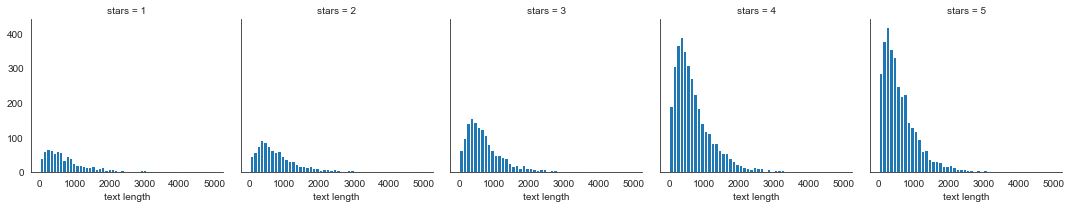

In [8]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

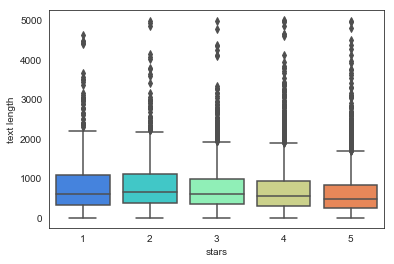

In [9]:
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

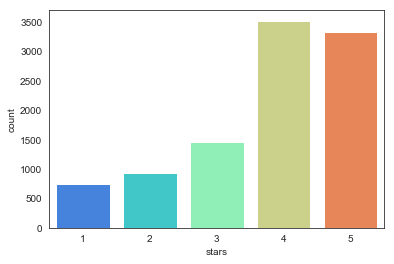

In [10]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


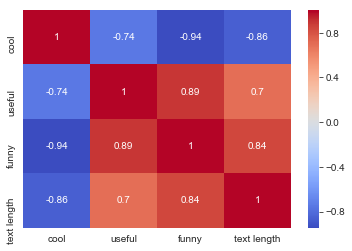

In [13]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

**Creating a DF that contains the columns of yelp DF for 1,2,3,4 &5 star reviews**

In [14]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 2) | (yelp['stars'] == 3) | (yelp['stars'] == 4) | (yelp['stars'] == 5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
text length    10000 non-null int64
dtypes: int64(5), object(6)
memory usage: 937.5+ KB


In [15]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


**Features and target/labels**

In [22]:
X = yelp_class['text']
y = yelp_class['stars']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
CV = CountVectorizer()

In [26]:
X = CV.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Train NLP model using default parameters

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
nb = MultinomialNB().

In [31]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [32]:
predictions = nb.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

   micro avg       0.47      0.47      0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



## Using Text Processing

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

In [37]:
X = yelp_class['text']
y = yelp_class['stars']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [39]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Predictions and Evaluations

In [40]:
predictions = pipe.predict(X_test)

In [41]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       1.00      0.00      0.00       443
           4       0.38      0.92      0.54      1064
           5       0.66      0.29      0.40      1000

   micro avg       0.42      0.42      0.42      3000
   macro avg       0.41      0.24      0.19      3000
weighted avg       0.50      0.42      0.33      3000



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Get best parameters with GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time
import logging

In [43]:
print(__doc__)

Automatically created module for IPython interactive environment


In [58]:
parameters = {
    'bow__max_df': (0.5, 0.75, 1.0),
    'bow__max_features': (None, 5000, 10000, 50000),
    'bow__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'model__alpha': (0.00001, 0.000001),
}

grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1)

if __name__ == "__main__":
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipe.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['bow', 'tfidf', 'model']
parameters:
{'bow__max_df': (0.5, 0.75, 1.0),
 'bow__max_features': (None, 5000, 10000, 50000),
 'bow__ngram_range': ((1, 1), (1, 2)),
 'model__alpha': (1e-05, 1e-06),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 192 candidates, totalling 576 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  7.6min finished


done in 459.202s

Best score: 0.492
Best parameters set:
	bow__max_df: 0.5
	bow__max_features: 5000
	bow__ngram_range: (1, 2)
	model__alpha: 1e-05
	tfidf__norm: 'l2'
	tfidf__use_idf: False


In [59]:
grid_predictions = grid_search.predict(X_test)

In [60]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 74  29   8  70  39]
 [ 23  39  31 152  28]
 [  6  13  40 328  56]
 [  5   3  12 764 280]
 [  2   0   0 375 623]]


              precision    recall  f1-score   support

           1       0.67      0.34      0.45       220
           2       0.46      0.14      0.22       273
           3       0.44      0.09      0.15       443
           4       0.45      0.72      0.56      1064
           5       0.61      0.62      0.62      1000

   micro avg       0.51      0.51      0.51      3000
   macro avg       0.53      0.38      0.40      3000
weighted avg       0.52      0.51      0.48      3000



## Changing the model to Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

#### Get best parameters with GridSearchCV

In [64]:
parameters = {
    'bow__max_df': (0.5, 0.75, 1.0),
    'bow__max_features': (None, 5000, 10000, 50000),
    'bow__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    "model__C":np.logspace(-4,4,20), 
    "model__penalty":["l1","l2"], 
    'model__solver': ['liblinear'], 
    'model__fit_intercept':[True,False]
}

grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1)

if __name__ == "__main__":
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipe.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['bow', 'tfidf', 'model']
parameters:
{'bow__max_df': (0.5, 0.75, 1.0),
 'bow__max_features': (None, 5000, 10000, 50000),
 'bow__ngram_range': ((1, 1), (1, 2)),
 'model__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'model__fit_intercept': [True, False],
 'model__penalty': ['l1', 'l2'],
 'model__solver': ['liblinear'],
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False)}
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.9min
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | 

done in 101861.296s

Best score: 0.521
Best parameters set:
	bow__max_df: 0.5
	bow__max_features: None
	bow__ngram_range: (1, 2)
	model__C: 10000.0
	model__fit_intercept: True
	model__penalty: 'l2'
	model__solver: 'liblinear'
	tfidf__norm: 'l1'
	tfidf__use_idf: True


In [65]:
grid_predictions = grid_search.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[101  50  16  29  24]
 [ 35  89  64  62  23]
 [ 14  34 132 211  52]
 [  7   9  68 672 308]
 [  4   7  17 326 646]]


              precision    recall  f1-score   support

           1       0.63      0.46      0.53       220
           2       0.47      0.33      0.39       273
           3       0.44      0.30      0.36       443
           4       0.52      0.63      0.57      1064
           5       0.61      0.65      0.63      1000

   micro avg       0.55      0.55      0.55      3000
   macro avg       0.53      0.47      0.49      3000
weighted avg       0.54      0.55      0.54      3000

